## 01 서울시 구별 CCTV 현황 분석하기

### [학습목표]
- 서울시 각 구별 CCTV 수 파악, 인구대비 CCTV 비율 확인, 순위
- 인구대비 CCTV 평균치 확인, 부족한 구 확인

# **2023-05-02**

In [3]:
import pandas as pd
import numpy as np

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 서울시 연도별 CCTV 현황(2017발표)
CCTV_Seoul = pd.read_csv(
    '../data/01. CCTV_in_Seoul.csv'
    #, encoding='utf-8'
)
CCTV_Seoul.head()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
# 컬럼명 : 기관명 => 구별

CCTV_Seoul.rename(
    columns={CCTV_Seoul.columns[0] : '구별'}
    ,inplace=True   # 변경사항 원본에 바로 반영 ~ 대입 할 필요x
)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 2-2. 엑셀 파일 읽기 -  서울시 인구 현황

In [7]:
# xls file => xlrd module install

pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls'
                          #, encoding='utf-8'
                          )
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls'
                          ,header=2         # 헤더선택

                          #,parse_cols='B,D,G,J,N'
                          ,usecols = [1,3,6,9,13] # 컬럼선택(자치구, 계)
)
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
pop_Seoul.rename(columns={
                    pop_Seoul.columns[0] : '구별'
                    ,pop_Seoul.columns[1] : '인구수'
                    ,pop_Seoul.columns[2] : '한국인'
                    ,pop_Seoul.columns[3] : '외국인'
                    ,pop_Seoul.columns[4] : '고령자'
                    }
                    ,inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 3. Pandas 기초

In [10]:
dates = pd.date_range('20230101',periods=6,freq='M')
dates

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30'],
              dtype='datetime64[ns]', freq='M')

In [11]:
# 임의의 데이터 생성 6X4
# np.random.randn(row,column) 표준정규분포를 따르는 정수 난수 생성
# -정규분포 : 평균을 기준으로 대칭, 면적이 1, 표준편차 사용
np.random.seed(42)
df = pd.DataFrame(
              np.random.randn(6,4)
            , index=dates
            , columns=['a','b','c','d']
)
df

,a,b,c,d
2023-01-31,0.496714,-0.138264,0.647689,1.523030
2023-02-28,-0.234153,-0.234137,1.579213,0.767435
2023-03-31,-0.469474,0.542560,-0.463418,-0.465730
2023-04-30,0.241962,-1.913280,-1.724918,-0.562288
2023-05-31,-1.012831,0.314247,-0.908024,-1.412304
2023-06-30,1.465649,-0.225776,0.067528,-1.424748


In [12]:
df.describe()

,a,b,c,d
count,6.000000,6.000000,6.000000,6.000000
mean,0.081311,-0.275775,-0.133655,-0.262434
std,0.861950,0.862828,1.168366,1.187681
min,-1.012831,-1.913280,-1.724918,-1.424748
25%,-0.410644,-0.232047,-0.796872,-1.199800
50%,0.003904,-0.182020,-0.197945,-0.514009
75%,0.433026,0.201119,0.502648,0.459144
max,1.465649,0.542560,1.579213,1.523030


In [13]:
df['b']

2023-01-31   -0.138264
2023-02-28   -0.234137
2023-03-31    0.542560
2023-04-30   -1.913280
2023-05-31    0.314247
2023-06-30   -0.225776
Freq: M, Name: b, dtype: float64

In [14]:
# sort_values() : 값에 의해 정렬
# ascending=True default
df.sort_values(by='b',ascending=False)

,a,b,c,d
2023-03-31,-0.469474,0.542560,-0.463418,-0.465730
2023-05-31,-1.012831,0.314247,-0.908024,-1.412304
2023-01-31,0.496714,-0.138264,0.647689,1.523030
2023-06-30,1.465649,-0.225776,0.067528,-1.424748
2023-02-28,-0.234153,-0.234137,1.579213,0.767435
2023-04-30,0.241962,-1.913280,-1.724918,-0.562288


In [15]:
df['202303':'202306']

,a,b,c,d
2023-03-31,-0.469474,0.542560,-0.463418,-0.465730
2023-04-30,0.241962,-1.913280,-1.724918,-0.562288
2023-05-31,-1.012831,0.314247,-0.908024,-1.412304
2023-06-30,1.465649,-0.225776,0.067528,-1.424748


In [16]:
df.loc[dates[0]]

a    0.496714
b   -0.138264
c    0.647689
d    1.523030
Name: 2023-01-31 00:00:00, dtype: float64

In [17]:
df.loc['202303':'202306',['a','c']]

,a,c
2023-03-31,-0.469474,-0.463418
2023-04-30,0.241962,-1.724918
2023-05-31,-1.012831,-0.908024
2023-06-30,1.465649,0.067528


In [18]:
df.iloc[3:,1:3]

,b,c
2023-04-30,-1.913280,-1.724918
2023-05-31,0.314247,-0.908024
2023-06-30,-0.225776,0.067528


In [19]:
df.iloc[[1,2,4],[0,2]]

,a,c
2023-02-28,-0.234153,1.579213
2023-03-31,-0.469474,-0.463418
2023-05-31,-1.012831,-0.908024


In [20]:
df[df.a > 0]

,a,b,c,d
2023-01-31,0.496714,-0.138264,0.647689,1.523030
2023-04-30,0.241962,-1.913280,-1.724918,-0.562288
2023-06-30,1.465649,-0.225776,0.067528,-1.424748


In [21]:
df2 = df.copy()

In [22]:
df2['e'] =  ['one','one','two','three','four','three']
df2

,a,b,c,d,e
2023-01-31,0.496714,-0.138264,0.647689,1.523030,one
2023-02-28,-0.234153,-0.234137,1.579213,0.767435,one
2023-03-31,-0.469474,0.542560,-0.463418,-0.465730,two
2023-04-30,0.241962,-1.913280,-1.724918,-0.562288,three
2023-05-31,-1.012831,0.314247,-0.908024,-1.412304,four
2023-06-30,1.465649,-0.225776,0.067528,-1.424748,three


In [23]:
df2['e'].isin(['two','four'])

2023-01-31    False
2023-02-28    False
2023-03-31     True
2023-04-30    False
2023-05-31     True
2023-06-30    False
Freq: M, Name: e, dtype: bool

In [24]:
df[df2['e'].isin(['two','four'])]

,a,b,c,d
2023-03-31,-0.469474,0.542560,-0.463418,-0.465730
2023-05-31,-1.012831,0.314247,-0.908024,-1.412304


In [25]:
df

,a,b,c,d
2023-01-31,0.496714,-0.138264,0.647689,1.523030
2023-02-28,-0.234153,-0.234137,1.579213,0.767435
2023-03-31,-0.469474,0.542560,-0.463418,-0.465730
2023-04-30,0.241962,-1.913280,-1.724918,-0.562288
2023-05-31,-1.012831,0.314247,-0.908024,-1.412304
2023-06-30,1.465649,-0.225776,0.067528,-1.424748


In [26]:
# 누적합(컬럼단위)

df.apply(np.cumsum)

,a,b,c,d
2023-01-31,0.496714,-0.138264,0.647689,1.523030
2023-02-28,0.262561,-0.372401,2.226901,2.290465
2023-03-31,-0.206914,0.170159,1.763484,1.824735
2023-04-30,0.035049,-1.743121,0.038566,1.262447
2023-05-31,-0.977782,-1.428874,-0.869458,-0.149856
2023-06-30,0.487866,-1.654650,-0.801930,-1.574605


In [27]:
df.apply(lambda x: x.max() - x.min())

a    2.478480
b    2.455840
c    3.304131
d    2.947778
dtype: float64

## 4. CCTV 데이터 파악하기

In [28]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [29]:
CCTV_Seoul.sort_values(by='소계',ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [30]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) \
                            / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [31]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 5. 서울시 인구 데이터 파악하기

In [32]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [33]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [34]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [35]:
pop_Seoul.iloc[-1:,:]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [36]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [37]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [38]:
pop_Seoul.drop([26],inplace=True)
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [39]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [40]:
pop_Seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [41]:
pop_Seoul.sort_values(by='외국인',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [42]:
pop_Seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


---

# **2023-05-03**

## 6. Pandas 고급 두 DataFrame 병합하기

In [56]:
df1 = pd.DataFrame({
     'A':['A0','A1','A2','A3']
    ,'B':['B0','B1','B2','B3']
    ,'C':['C0','C1','C2','C3']
    ,'D':['D0','D1','D2','D3']
    }, index=[0,1,2,3]
)
df2 = pd.DataFrame({
     'A':['A4','A5','A6','A7']
    ,'B':['B4','B5','B6','B7']
    ,'C':['C4','C5','C6','C7']
    ,'D':['D4','D5','D6','D7']
    }, index=[4,5,6,7]
)
df3 = pd.DataFrame({
     'A':['A8','A9','A10','A11']
    ,'B':['B8','B9','B10','B11']
    ,'C':['C8','C9','C10','C11']
    ,'D':['D8','D9','D10','D11']
    }, index=[8,9,10,11]
)

In [46]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [47]:
result = pd.concat([df1,df2,df3], axis=0)   #default=0
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [49]:
result = pd.concat([df1,df2,df3], keys=['Samsung','LG','SK'])
result

A    B    C    D
Samsung 0    A0   B0   C0   D0
        1    A1   B1   C1   D1
        2    A2   B2   C2   D2
        3    A3   B3   C3   D3
LG      4    A4   B4   C4   D4
        5    A5   B5   C5   D5
        6    A6   B6   C6   D6
        7    A7   B7   C7   D7
SK      8    A8   B8   C8   D8
        9    A9   B9   C9   D9
        10  A10  B10  C10  D10
        11  A11  B11  C11  D11

In [50]:
result.index

MultiIndex([('Samsung',  0),
            ('Samsung',  1),
            ('Samsung',  2),
            ('Samsung',  3),
            (     'LG',  4),
            (     'LG',  5),
            (     'LG',  6),
            (     'LG',  7),
            (     'SK',  8),
            (     'SK',  9),
            (     'SK', 10),
            (     'SK', 11)],
           )

In [53]:
result.index.get_level_values(0)

Index(['Samsung', 'Samsung', 'Samsung', 'Samsung', 'LG', 'LG', 'LG', 'LG',
       'SK', 'SK', 'SK', 'SK'],
      dtype='object')

In [54]:
result.index.get_level_values(1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [57]:
df4 = pd.DataFrame({
     'B':['B2','B3','B6','B7']
    ,'D':['D2','D3','D6','D7']
    ,'F':['F2','F3','F6','F7']
    }, index=[2,3,6,7]
)

In [60]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [58]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [59]:
result = pd.concat([df1,df4],axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [61]:
result = pd.concat([df1,df4],axis=1,join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [ ]:
pd.concat?

In [ ]:
#result = pd.concat([df1,df4], axis=1, join_axes=[df1.index])
#result

In [65]:
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [70]:
left = pd.DataFrame({
    'key':['K0','K4','K2','K3']
    ,'A':['A0','A1','A2','A3']
    ,'B':['B0','B1','B2','B3']
})

right = pd.DataFrame({
    'key':['K0','K1','K2','K3']
    ,'C':['C0','C1','C2','C3']
    ,'D':['D0','D1','D2','D3']
})

In [71]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [72]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [73]:
pd.merge(left,right, on='key')  # how= defualt inner join

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [74]:
pd.merge(left, right, how='left', on='key')  # left outer join

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [75]:
pd.merge(left,right,how='right', on='key')   # right outer join

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [77]:
pd.merge(left, right, how='outer', on='key')   # (full) outer join

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


## 7. CCTV 데이터와 인구 데이터 합치고 분석하기

### 데이터 합치기

In [78]:
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


In [84]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [88]:
data_result.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [ ]:
#data_result.drop(columns=['2013년도 이전','2014년','2015년','2016년'])
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [92]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [93]:
# set_index  <->  reindex(set된 index 다시 column으로 복구)

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 데이터 탐석하기

** 상관계수가 다가 아님!

상관 계수 : np.corrcoef() 
        => return array

* +-0.15 : 약간 관련 있음
* +-0.75 : 매우 관련 있음

In [99]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [95]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [96]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [97]:
# CCTV 많은 순 정렬
data_result.sort_values(by='소계', ascending=False).head()  

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [98]:
# 인구 수 많은 순 정렬
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 8. 그래프 그리기 기초 - matplotlib

1. 도화지
```python
plt.figure()
```
2. 그리기 => 메모리상
```python
plt.plot()
```
3. show() => 출력
```python
plt.show()
```

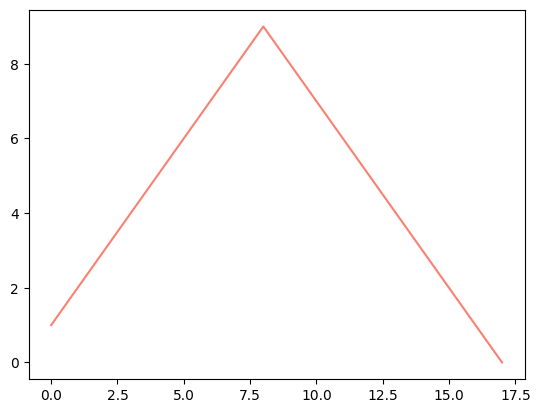

In [128]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0],color='salmon')
plt.show()

In [109]:
t = np.arange(0,12,0.1)
y = np.sin(t)
t,y

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9]),
 array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
         0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
         0.84147098,  0.89120736,  0.9320390

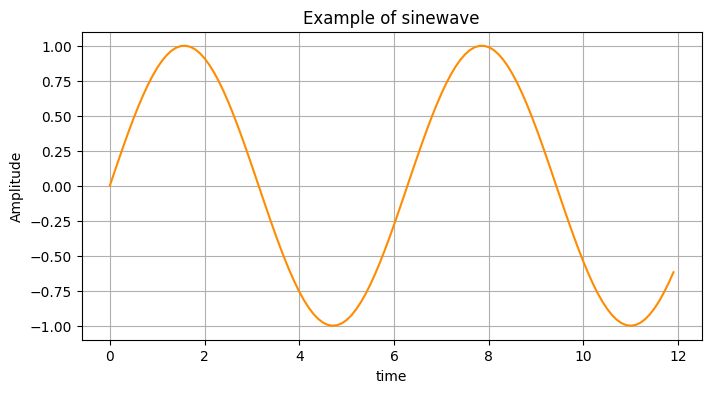

In [124]:
plt.figure(figsize=(8,4))
plt.plot(t,y, color='darkorange')

plt.grid()  # 그리드 적용하기

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')

plt.show()

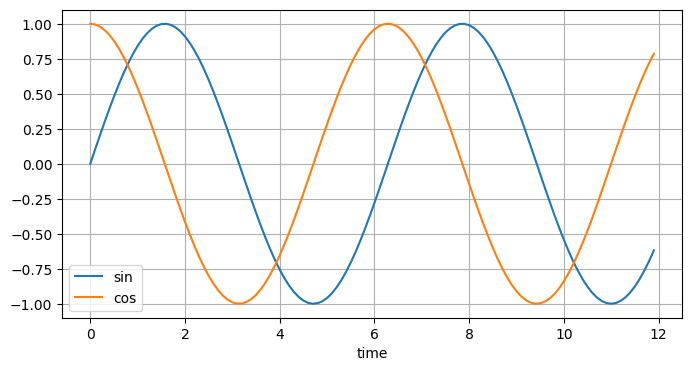

In [131]:
plt.figure(figsize=(8,4))
plt.plot(t,np.sin(t), label='sin')
plt.plot(t,np.cos(t), label='cos')

plt.grid()
plt.legend()    # 범례(label) 표시
plt.xlabel('time')

plt.show()

### 그래프 스타일 세팅

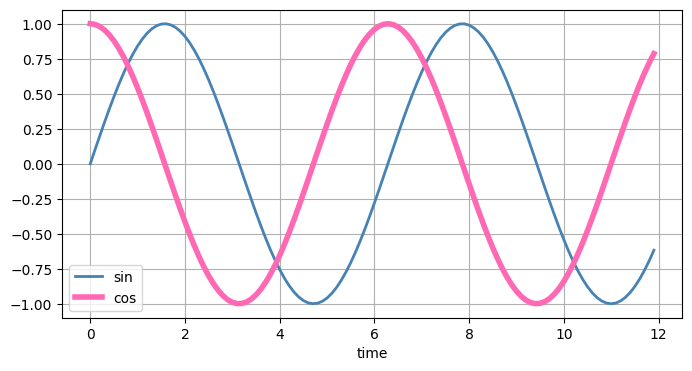

In [133]:
plt.figure(figsize=(8,4))
plt.plot(t,np.sin(t), label='sin', lw=2, color='steelblue')  # lw=linewidth
plt.plot(t,np.cos(t), label='cos', lw=4, color='hotpink')

plt.grid()
plt.legend()    # 범례(label) 표시
plt.xlabel('time')

plt.show()

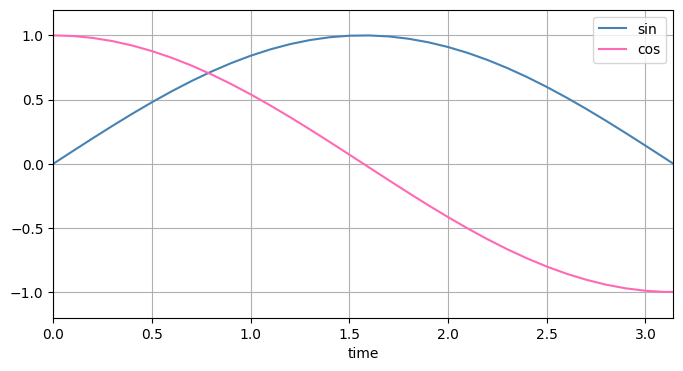

In [135]:
plt.figure(figsize=(8,4))
plt.plot(t,np.sin(t), label='sin', color='steelblue')  
plt.plot(t,np.cos(t), label='cos', color='hotpink')

plt.grid()
plt.legend()    
plt.xlabel('time')

# 그래프 부분 확대해서 보기
plt.ylim(-1.2,1.2)
plt.xlim(0,np.pi)

plt.show()

### 상세한 스타일 지정

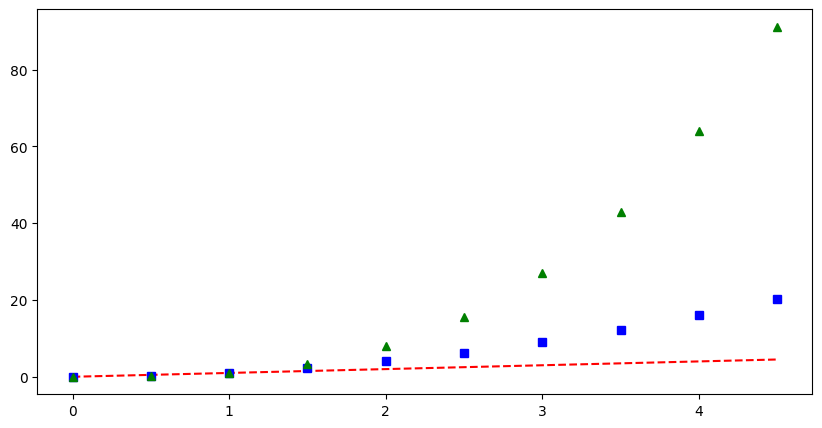

In [149]:
t = np.arange(0,5,0.5)

plt.figure(figsize=(10,5))
plt.plot(t, t,   'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')

plt.show()

linestyle=

- solid
- dashed : ' -- '
- dotted : ' : '
- dashdot : ' -. '

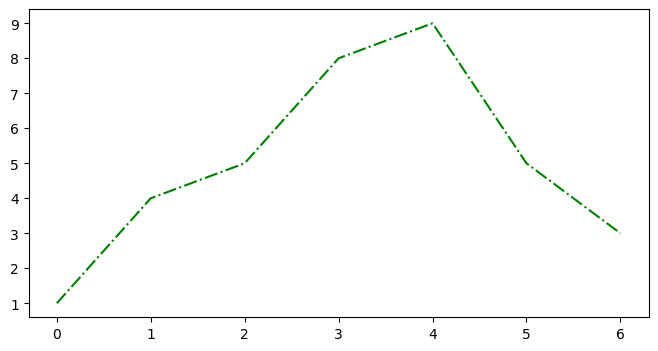

In [162]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]

plt.figure(figsize=(8,4))
#plt.plot(t, y, color='slateblue', linestyle='dashed'
#               , marker='o', markerfacecolor='plum', markersize='10')
plt.plot(t,y,'g-.')
plt.show()

### 산점도

In [172]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

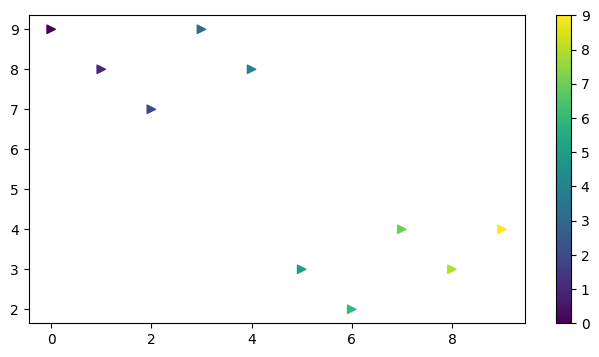

In [180]:
colormap = t

plt.figure(figsize=(8,4))
plt.scatter(t,y, marker='>', c=colormap) # c=[0,1,2,3,4,5,6,7,8,9]

plt.colorbar()
plt.show()

## 9. CCTV와 인구 현황 그래프로 분석하기

---

#### **한글 처리**

In [188]:
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

---



#### DataFrame에서 그림 그리기

In [189]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [258]:
import seaborn as sns
colors = sns.color_palette('hls',31)

In [259]:
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.47184516129032256, 0.33999999999999997),
 (0.86, 0.572490322580645, 0.33999999999999997),
 (0.86, 0.6731354838709677, 0.33999999999999997),
 (0.86, 0.7737806451612903, 0.33999999999999997),
 (0.8455741935483869, 0.86, 0.33999999999999997),
 (0.7449290322580644, 0.86, 0.33999999999999997),
 (0.6442838709677419, 0.86, 0.33999999999999997),
 (0.5436387096774195, 0.86, 0.33999999999999997),
 (0.4429935483870969, 0.86, 0.33999999999999997),
 (0.3423483870967741, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.4382967741935485),
 (0.33999999999999997, 0.86, 0.5389419354838709),
 (0.33999999999999997, 0.86, 0.6395870967741935),
 (0.33999999999999997, 0.86, 0.7402322580645162),
 (0.33999999999999997, 0.86, 0.8408774193548388),
 (0.33999999999999997, 0.7784774193548386, 0.86),
 (0.33999999999999997, 0.6778322580645161, 0.86),
 (0.33999999999999997, 0.5771870967741937, 0.86),
 (0.33999999999999997, 0.47654193548387075, 0.86),
 (0.33999999999999997, 0.3758967741935483, 0.86),
 (0.4047483870967742, 0.33999999999999997, 0.86),
 (0.5053935483870966, 0.33999999999999997, 0.86),
 (0.6060387096774191, 0.33999999999999997, 0.86),
 (0.7066838709677417, 0.33999999999999997, 0.86),
 (0.8073290322580642, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8120258064516128),
 (0.86, 0.33999999999999997, 0.7113806451612903),
 (0.86, 0.33999999999999997, 0.6107354838709678),
 (0.86, 0.33999999999999997, 0.5100903225806452),
 (0.86, 0.33999999999999997, 0.4094451612903221)]

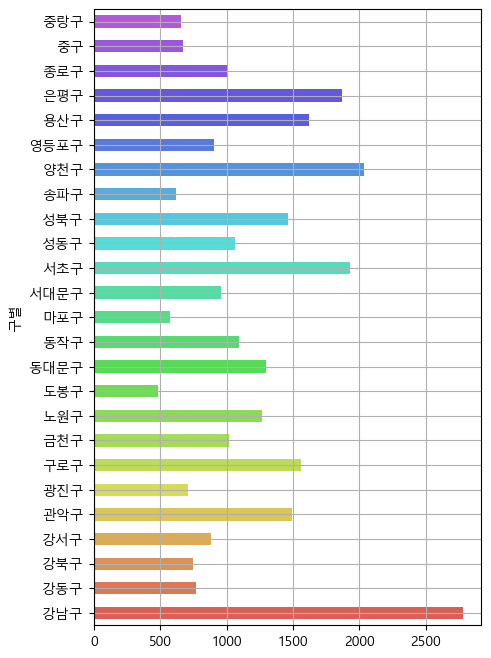

In [263]:
plt.figure(figsize=(5,8))
data_result['소계'].plot(kind='barh',grid=True,color=colors)
plt.show()

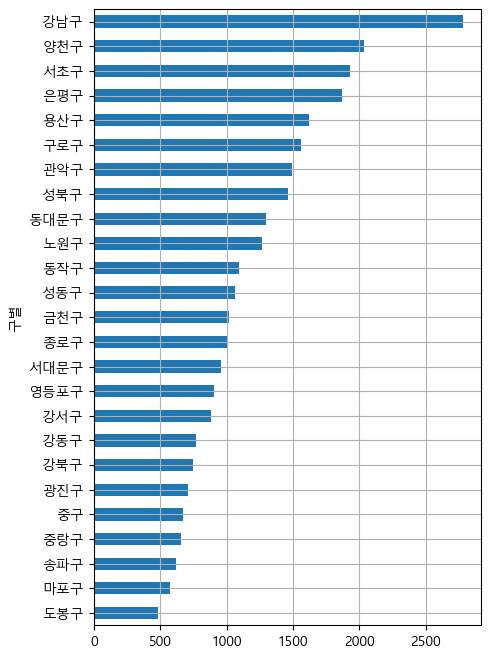

In [198]:
plt.figure(figsize=(5,8))
data_result['소계'].sort_values().plot(kind='barh',grid=True)
plt.show()

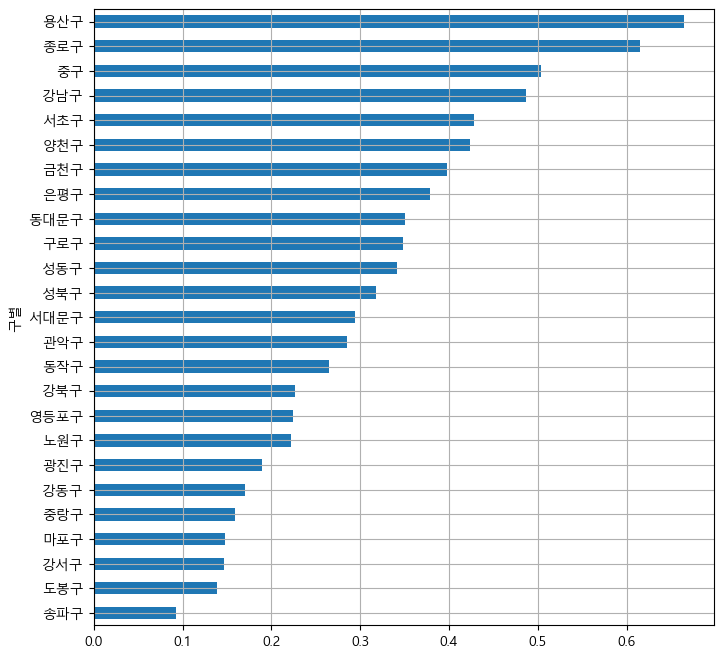

In [200]:
# 비율 = 소계/인구수 * 100

data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100 
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(8,8))

plt.show()

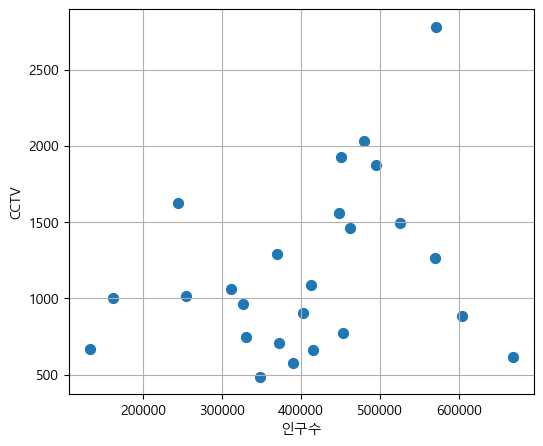

In [202]:
# 인구수와 cctv 개수 분포 확인
plt.figure(figsize=(6,5))
plt.scatter(data_result['인구수'],data_result['소계'], s=50)

plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()
plt.show()

#### 데이터를 대표하는 직선 표시(CCTV와 인구수는 양의 상관관계)

- polyfit()
- poly1d()

In [212]:
# polyfit :  지정한 특수 차수의 다항식 계수 계산
# f(x) = ax + b 의 [a, b]

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [213]:
# poly1d : 계수를 사용한 실제 다항식 생성

f1 = np.poly1d(fp1)


In [218]:
np.linspace(0,100,5)

array([  0.,  25.,  50.,  75., 100.])

In [215]:
fx = np.linspace(100000,700000,100) #십만~칠십만까지 100칸으로 나눔

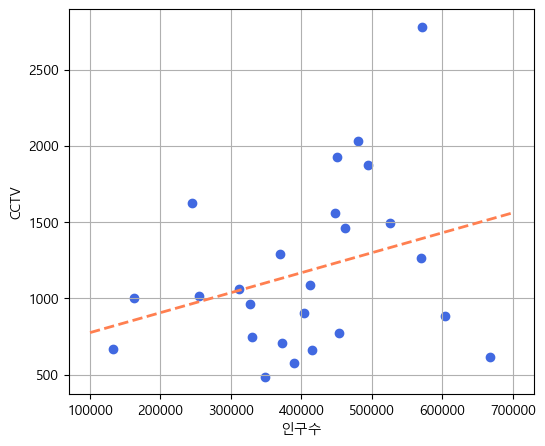

In [228]:
plt.figure(figsize=(6,5))
plt.scatter(data_result['인구수'], data_result['소계'],color='royalblue')
plt.plot(fx, f1(fx), ls='dashed',lw='2', color='coral')     # 표준데이터

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## 10. 조금 더 설득력 있는 자료 만들기

### 오차구하기

In [229]:
data_result['오차'] = np.abs( data_result['소계'] - f1(data_result['인구수']) )

data_result.head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [231]:
# 오차가 큰 구 순서로 추출

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


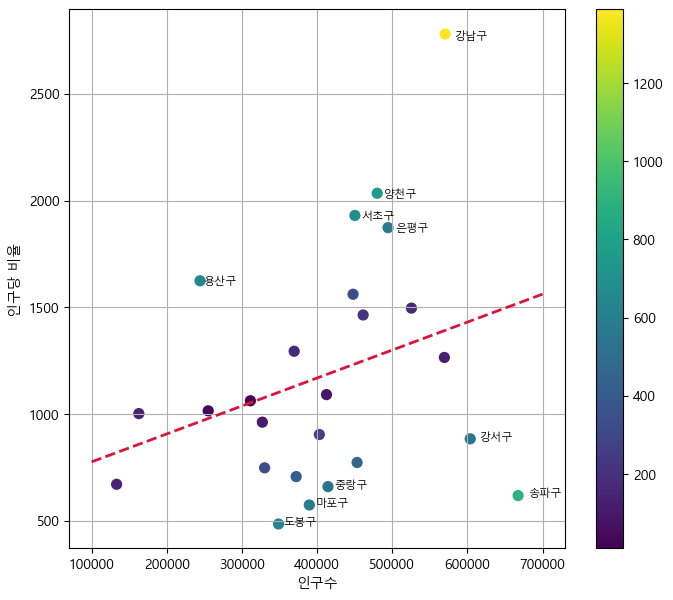

In [247]:
plt.figure(figsize=(8,7))

plt.scatter(data_result['인구수'], data_result['소계']
            ,c=data_result['오차'],s=50)
plt.plot(fx, f1(fx), ls='dashed',lw='2', color='crimson')     # 표준데이터

# maker 옆에 구 이름 10개만 붙이기
for n in range(10):

    #        |<-------- 텍스트 위치 잡기 -------->|<---- 텍스트 ---->|<-크기설정->|
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.99, df_sort.index[n], fontsize=8)

plt.xlabel('인구수')
plt.ylabel('인구당 비율')
plt.colorbar()
plt.grid()
plt.show()